# MFM Ojol Classification

Install Depedency

In [1]:
# !pip3 install numpy
# !pip3 install https://download.pytorch.org/whl/cu100/torch-1.0.1.post2-cp35-cp35m-linux_x86_64.whl
# !pip3 install torchvision
# !pip3 install matplotlib

import library

In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import os
import copy

global variable

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
MODEL_PATH = "model/ride-hailing_model_mfm_demo_1.pth"
BATCH_SIZE = 4
WORKERS = 4
DATA_DIR = 'ojol-dataset'

## Prepare dataset

Image transform

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

Create dataset

In [4]:
image_datasets = {x: datasets.ImageFolder(os.path.join(DATA_DIR, x), data_transforms[x])
                    for x in ['train', 'val']}

dataloaders = {}
dataloaders['train'] = DataLoader(image_datasets['train'], batch_size=BATCH_SIZE, 
                                  shuffle=True, num_workers=WORKERS)
dataloaders['val'] = DataLoader(image_datasets['val'], batch_size=BATCH_SIZE, num_workers=WORKERS)


dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

Show image tensor

In [5]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(1)  # pause a bit so that plots are updated

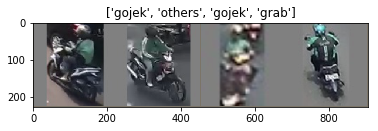

In [8]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

#  Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## Training Model

define training and validation function

In [9]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(1, num_epochs+1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 11)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

Define model

In [10]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 3)

model_ft = model_ft.to(device)

model structure

In [11]:
for name, param in model_ft.named_parameters():
    print(name)

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.we

define hyperparameter

In [14]:
# Define loss function
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=1, momentum=0.9)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

training model

In [15]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)


torch.save(model_ft, MODEL_PATH)

Epoch 1/15
-----------
train Loss: 6.5115 Acc: 0.3584
val Loss: 2.3553 Acc: 0.3806

Epoch 2/15
-----------
train Loss: 1.5507 Acc: 0.3516
val Loss: 3.4263 Acc: 0.3097

Epoch 3/15
-----------
train Loss: 1.6080 Acc: 0.3333
val Loss: 2.0706 Acc: 0.3613

Epoch 4/15
-----------
train Loss: 1.6510 Acc: 0.3265
val Loss: 1.9477 Acc: 0.3355

Epoch 5/15
-----------
train Loss: 1.6920 Acc: 0.3105
val Loss: 1.3223 Acc: 0.3097

Epoch 6/15
-----------
train Loss: 1.5562 Acc: 0.3208
val Loss: 2.9549 Acc: 0.3097

Epoch 7/15
-----------
train Loss: 1.6254 Acc: 0.3824
val Loss: 1.8687 Acc: 0.3097

Epoch 8/15
-----------
train Loss: 1.5104 Acc: 0.3459
val Loss: 1.6707 Acc: 0.3871

Epoch 9/15
-----------
train Loss: 1.5200 Acc: 0.3413
val Loss: 2.0462 Acc: 0.3484

Epoch 10/15
-----------
train Loss: 1.9058 Acc: 0.3345
val Loss: 1.4076 Acc: 0.3677

Epoch 11/15
-----------
train Loss: 1.1523 Acc: 0.3368
val Loss: 1.8706 Acc: 0.3097

Epoch 12/15
-----------
train Loss: 1.1485 Acc: 0.3368
val Loss: 2.8100 Ac

Visualize model prediction

In [13]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

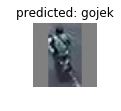

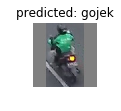

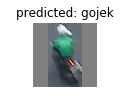

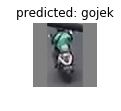

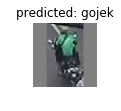

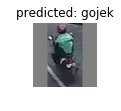

In [14]:
visualize_model(model_ft)